# Adult Dataset


<b>Introduction</b>

The information is a replica of the notes for the abalone dataset from the UCI repository.
<ul>
<li><b> Title of Database</b>: <b>adult</b></li>
<li> <b>Sources:</b></li>
(a) Original owners of database (name/phone/snail address/email address)
US Census Bureau.<br>
(b) Donor of database (name/phone/snail address/email address)<br>
Ronny Kohavi and Barry Becker, <br>
Data Mining and Visualization <br>
Silicon Graphics.<br> 
e-mail: ronnyk@sgi.com <br>
(c) Date received (databases may change over time without name change!)
05/19/96<br>
(a) Complete reference of article where it was described/used<br>
@inproceedings{kohavi-nbtree, 
author={Ron Kohavi}, <br>
<li><b> Number of Instances</b></li>
<ol>
<li>48842 instances, mix of continuous and discrete (train=32561, test=16281)</li>
<li>45222 if instances with unknown values are removed (train=30162, test=15060)</li>
<li>Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).</li>
</ol>
<li><b> Number of Attributes</b></li>
6 continuous<br> 8 nominal attributes.

<li><b>Attribute Information:</b></li>
<ol>    
<li><b>age</b>: continuous.</li>
<li><b>workclass:</b> Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.</li>
fnlwgt: continuous.</li>
<li><b>education:</b> Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.</li>
<li><b>education-num:</b> continuous.</li>
<li><b>marital-status:</b> Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.</li>
<li><b>occupation:</b> Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.</li>
<li><b>relationship:</b> Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.</li>
<li><b>race:</b> White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.</li>
<li><b>sex: </b>Female, Male.</li>
<li><b>capital-gain:</b> continuous.</li>
<li><b>capital-loss:</b> continuous.</li>
<li><b>hours-per-week:</b> continuous.</li>
<li><b>native-country:</b> United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.</li>
</ol>
    <b>class:</b> >50K, <=50K<br>
<li><b> Missing Attribute Values:</b>
7% have missing values.<br>
<li><b>Class Distribution:</b></li>
Probability for the label '>50K' : 23.93% / 24.78% (without unknowns) <br>
Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns) <br>
<li><b>Notes for Delve</b></li>
One prototask (income) has been defined, using attributes 1-13 as inputs and income level as a binary target.<br>
Missing values - These are confined to attributes 2 (workclass), 7 (occupation) and 14 (native-country). The prototask only uses cases with no missing values.<br>
The income prototask comes with two priors, differing according to if attribute 4 (education) is considered to be nominal or ordinal.<br>
</ul>

https://drive.google.com/file/d/17yZ1NSSsRrDF7qfGOJyGHRDDiBce7EQN/view?usp=sharing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


<h3> Reading the Data and viewing the data</h3>

<b>Head</b>
<ul>
<li> This function returns top 5 value of rows</li>
</ul>

In [2]:
miss_val=['?']
adult_df=pd.read_csv('test/adult.csv',na_values=miss_val)
adult_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


<h3>Calculating rows and column of data</h3>

In [3]:
adult_df.shape

(48842, 15)

<ul>
<li> this shows that there are 48842 rows and 15 columns</li>
</ul>

<h2>Handling Missing Values</h2>

<h3>Rows with any missing value</h3>

In [4]:
adult_df.isnull().any(axis=1)

0        False
1        False
2        False
3        False
4         True
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Length: 48842, dtype: bool

<h3>Number of rows with any missing value</h3>

In [5]:
adult_df.isnull().any(axis=1).sum()

3620

<ul>
<li> THere are 3620 columns which contains missing value</li>
</ul>

<h3>Removing all the missing vlue by removing rows</h3>

In [6]:
adult_df=adult_df[adult_df.isnull().sum(axis=1)<1]

<h3>Checking the number of rows which contains missing values</h3>

In [7]:
adult_df.isnull().any(axis=1).sum()

0

<ul>
<li>Now there is no missing values left in any rows</li>
</ul>

<h3>Removing the fnlwgt column</h3>

In [8]:
adult_df.drop(['fnlwgt'],axis=1,inplace=True)


In [9]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   education        45222 non-null  object
 3   educational-num  45222 non-null  int64 
 4   marital-status   45222 non-null  object
 5   occupation       45222 non-null  object
 6   relationship     45222 non-null  object
 7   race             45222 non-null  object
 8   gender           45222 non-null  object
 9   capital-gain     45222 non-null  int64 
 10  capital-loss     45222 non-null  int64 
 11  hours-per-week   45222 non-null  int64 
 12  native-country   45222 non-null  object
 13  income           45222 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.6+ MB


<h3>Percentage of rows that were removed while handling missing values</h3>

In [10]:
print((1-len(adult_df.index)/48842)*100,'%')

7.411653904426519 %


<ul><li>THere are 7.41% of rows are removed</li>
</ul>

<h3>Numerical description of data</h3>

In [11]:
adult_df.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


<h4>Observation</h4>
<ul>
<li><b>Age</b></li>
<ol>
<li>This contains age of an indivividual</li>
<li>The mean value of age is 38 and median is 37</li>
<li>The value of age lies from 17 to 90</li>
</ol>
<li><b>Educational-num</b></li>
<ol>
<li>This attributes contains the age of an individual</li>
<li>The mean is 10.11 and median is 10</li>
</ol>
<li><b>Capital-gain</b></li>
<ol>
<li>The mean is 1101.43 and median is 0</li>
<li>This shows some has high profit or not at all profit.</li>
</ol>
<li><b>Capital-loss</b></li>
<ol>
<li>The mean is 88.59and median is 0</li>
<li>This varies from 0 to 4356</li>
</ol>
<li><b>Hours-per-week</b></li>
<ol>
<li>The mean is 40.93 and median is 40.</li>
<li>THe values lies between 1 to 99</li>
</ol>
</ul>




In [12]:
adult_df.describe(include=['O'])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,45222,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,33307,14783,21055,6020,18666,38903,30527,41292,34014


<b> Observation</b>
<ul>
<li>Workclass</li>
<ol>
<li>This shows the individual work</li>
<li>The top category is private and total frequency of private is 33307</li>
<li>There are 7 unique values present in this column</li>
</ol>
<li>Education</li>
<ol>
<li>This shows the individual education</li>
<li>The top category is HS-grad and total frequency of HS-grad is 14783</li>
<li>There are 16 unique values present in this column</li>
</ol>
<li>Marital-status</li>
<ol>
<li>This shows the individual marital-status</li>
<li>The top category is married-civ-spouse and total frequency of married-with-spouse is 21055</li>
<li>There are 7 unique values present in this column</li>
</ol>
<li>Occupation</li>
<ol>
<li>This shows the individual occupation</li>
<li>The top category is Craft-repair and total frequency of craft-repair is 6020</li>
<li>There are 14 unique values present in this column</li>
</ol>
<li>Relationship</li>
<ol>
<li>This shows the individual relationship</li>
<li>The top category is husband and total frequency of relationship is 18666</li>
<li>There are 6 unique values present in this column</li>
</ol>
<li>Race</li>
<ol>
<li>This shows the individual race</li>
<li>The top category is white and total frequency of white is 38903</li>
<li>There are 5 unique values present in this column</li>
</ol>
<li>Gender</li>
<ol>
<li>This shows the individual gender</li>
<li>The top category is male and total frequency of gender is 30527</li>
<li>There are 2 unique values present in this column</li>
</ol>
<li>Native-country</li>
<ol>
<li>This shows the individual native-country</li>
<li>The top category is United-States and total frequency of United-States is 41292</li>
<li>There are 41 unique values present in this column</li>
</ol>

# Univariate Analysis

<h3>To find the outliers in each numerical columns</h3>

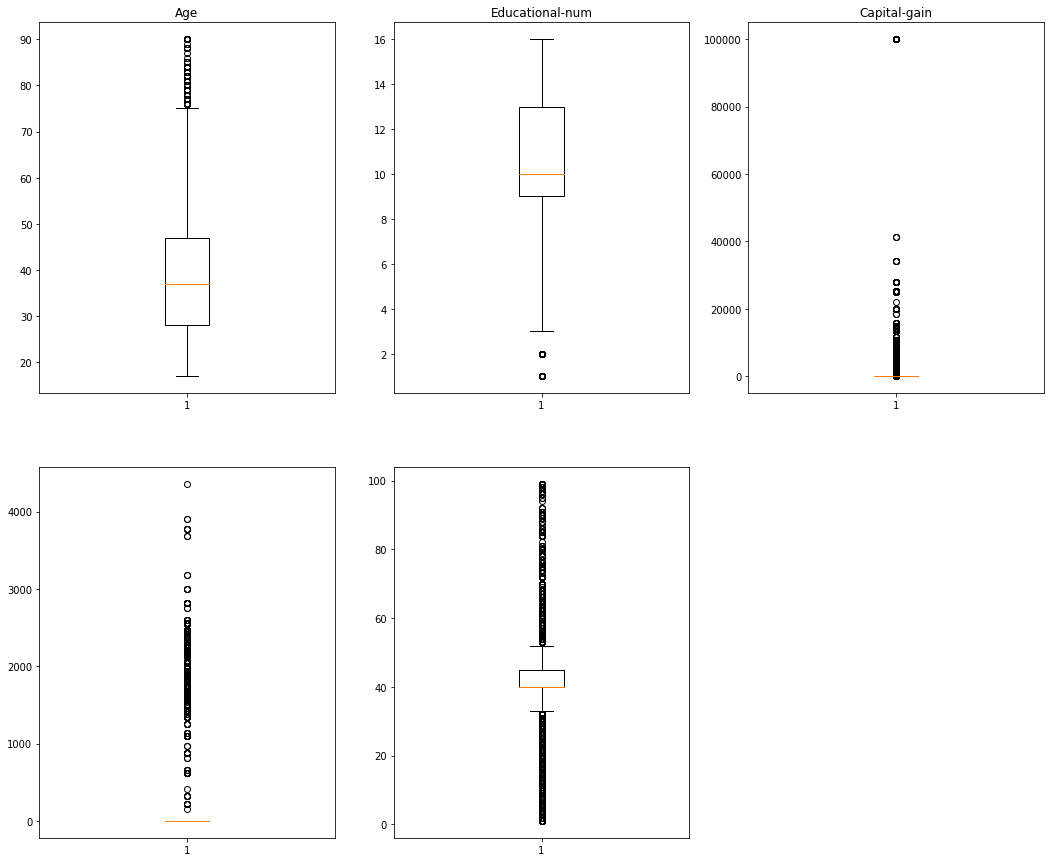

In [13]:
plt.figure(figsize=(18,15))
plt.subplot(2,3,1)
plt.boxplot([adult_df['age']])
plt.title('Age')

plt.subplot(2,3,2)
plt.boxplot([adult_df['educational-num']])
plt.title('Educational-num')

plt.subplot(2,3,3)
plt.boxplot([adult_df['capital-gain']])
plt.title('Capital-gain')

plt.subplot(2,3,4)
plt.boxplot([adult_df['capital-loss']])
plt.title('')

plt.subplot(2,3,5)
plt.boxplot([adult_df['hours-per-week']])

plt.show()

<b> Observation</b>
<ul>
<li>Age</li>
<ul>
<li>We can observe that median of age is 37.</li>
<li>After the 78 there are some outliers</li>
<li>Range is 20</li>
</ul>
<li>Educational-num</li>
<ul>
<li>The majority of density of education lies between 5 and 16</li>
<li>There are less outliers</li>
</ul>
<li>Capital-gain and Capital loss</li>
<ul>
<li> We can observe that there are less number of people who profit or loss</li>
<li>There are more outliers</li>
<li>We can observe that both capital gain and loss can be 0 as median is 0</li>
</ul>
<li>Hours-per-week</li>
<ul>
<li>through this we can observe that most of the individual work between 35 to 55 hours-per-week</li>
</ul>
</ul>


<h3>The frequency and probability distribution of numerical column</h1>

Text(0.5, 1.0, 'prob v/s age')

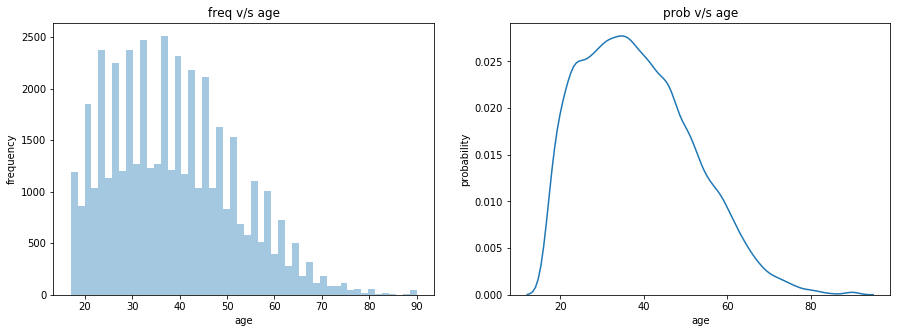

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(adult_df['age'],kde=False)
plt.xlabel('age')
plt.ylabel('frequency')
plt.title('freq v/s age')


plt.subplot(1,2,2)
sns.distplot(adult_df['age'],hist=False)
plt.xlabel('age')
plt.ylabel('probability')
plt.title('prob v/s age')




<b>Observation</b>
<ol>
<li>Age is not symmetric.</li>
<li>It has right skewness.</li>
<li>Minimum and maximum age is 17 and 90</li>
<li>Highest frequency of peoples lies between age of 20 to 50</li>
<li>less number of people of age 70 to 90</li>
</ol>

Text(0.5, 1.0, 'prob v/s educational-num')

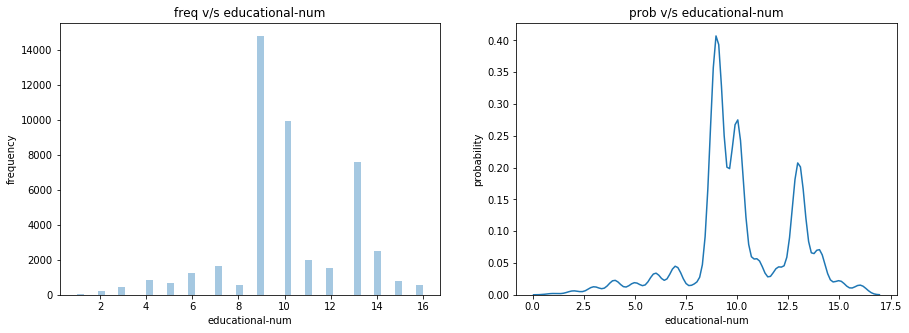

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(adult_df['educational-num'],kde=False)
plt.xlabel('educational-num')
plt.ylabel('frequency')
plt.title('freq v/s educational-num')

plt.subplot(1,2,2)
sns.distplot(adult_df['educational-num'],hist=False)
plt.xlabel('educational-num')
plt.ylabel('probability')
plt.title('prob v/s educational-num')


<b>Observation</b>
<ol>
<li> Mimimum and maximum educational-num is 1 and 9</li>
<li>Highest frequency of peoples lies between educational-num of 9 to 13</li>
<li>less number of people of have educational-num 1 to 8</li>
</ol>

Text(0.5, 1.0, 'prob v/s capital-gain')

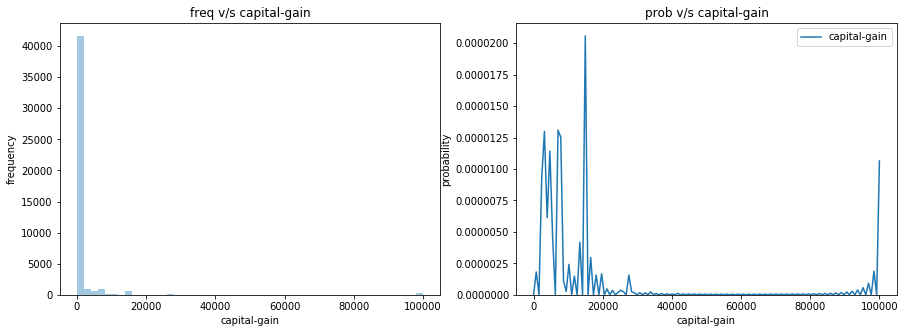

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(adult_df['capital-gain'],kde=False)
plt.xlabel('capital-gain')
plt.ylabel('frequency')
plt.title('freq v/s capital-gain')

plt.subplot(1,2,2)
sns.kdeplot(adult_df['capital-gain'],bw=1.5)
plt.xlabel('capital-gain')
plt.ylabel('probability')
plt.title('prob v/s capital-gain')


<b>Observation</b>
<ol>
<li>Through this we can say that some have maximum profit and some have no profit at all.</li>
<li>this shows that max people have no profit at all</li>
</ol>

Text(0.5, 1.0, 'prob v/s capital-loss')

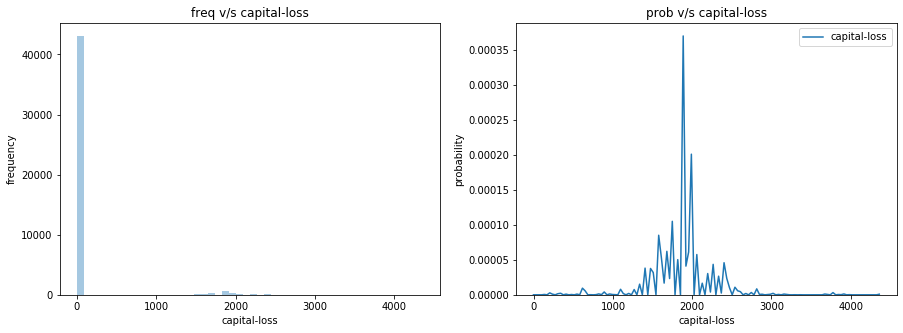

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(adult_df['capital-loss'],kde=False)
plt.xlabel('capital-loss')
plt.ylabel('frequency')
plt.title('freq v/s capital-loss')

plt.subplot(1,2,2)
sns.kdeplot(adult_df['capital-loss'],bw=1.5)
plt.xlabel('capital-loss')
plt.ylabel('probability')
plt.title('prob v/s capital-loss')


<b>Observation</b>
<ol>
<li>Through this we can say that some have maximum loss and some have no loss at all.</li>
<li>this shows that max people have no loss at all</li>
</ol>

Text(0.5, 1.0, 'prob v/s hours-per-week')

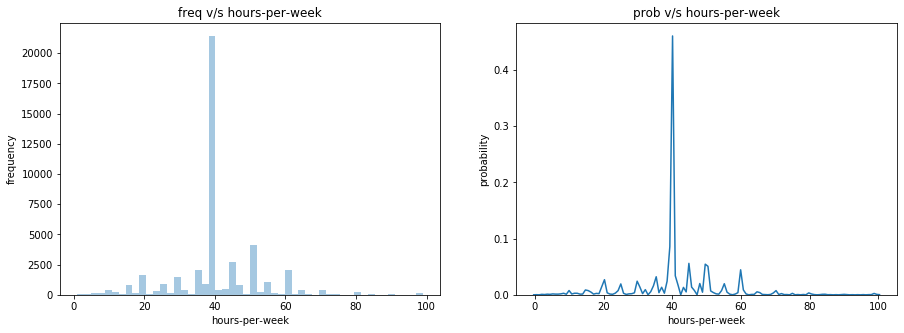

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(adult_df['hours-per-week'],kde=False)
plt.xlabel('hours-per-week')
plt.ylabel('frequency')
plt.title('freq v/s hours-per-week')

plt.subplot(1,2,2)
sns.distplot(adult_df['hours-per-week'],hist=False)
plt.xlabel('hours-per-week')
plt.ylabel('probability')
plt.title('prob v/s hours-per-week')


<b>Observation</b>
<ol>
<li>Through this we can say that some have maximum people have working hours around 40 per week and some have less than 20 hours-per-week</li>
<li>In this hours-per-week attributes lies between range of 1 to 99</li>
<li>There are very few people works in range of 80-100 hours per week</li>
</ol>

<h3>The frequency distribution of categorical column</h3>

Text(0.5, 1.0, 'Income')

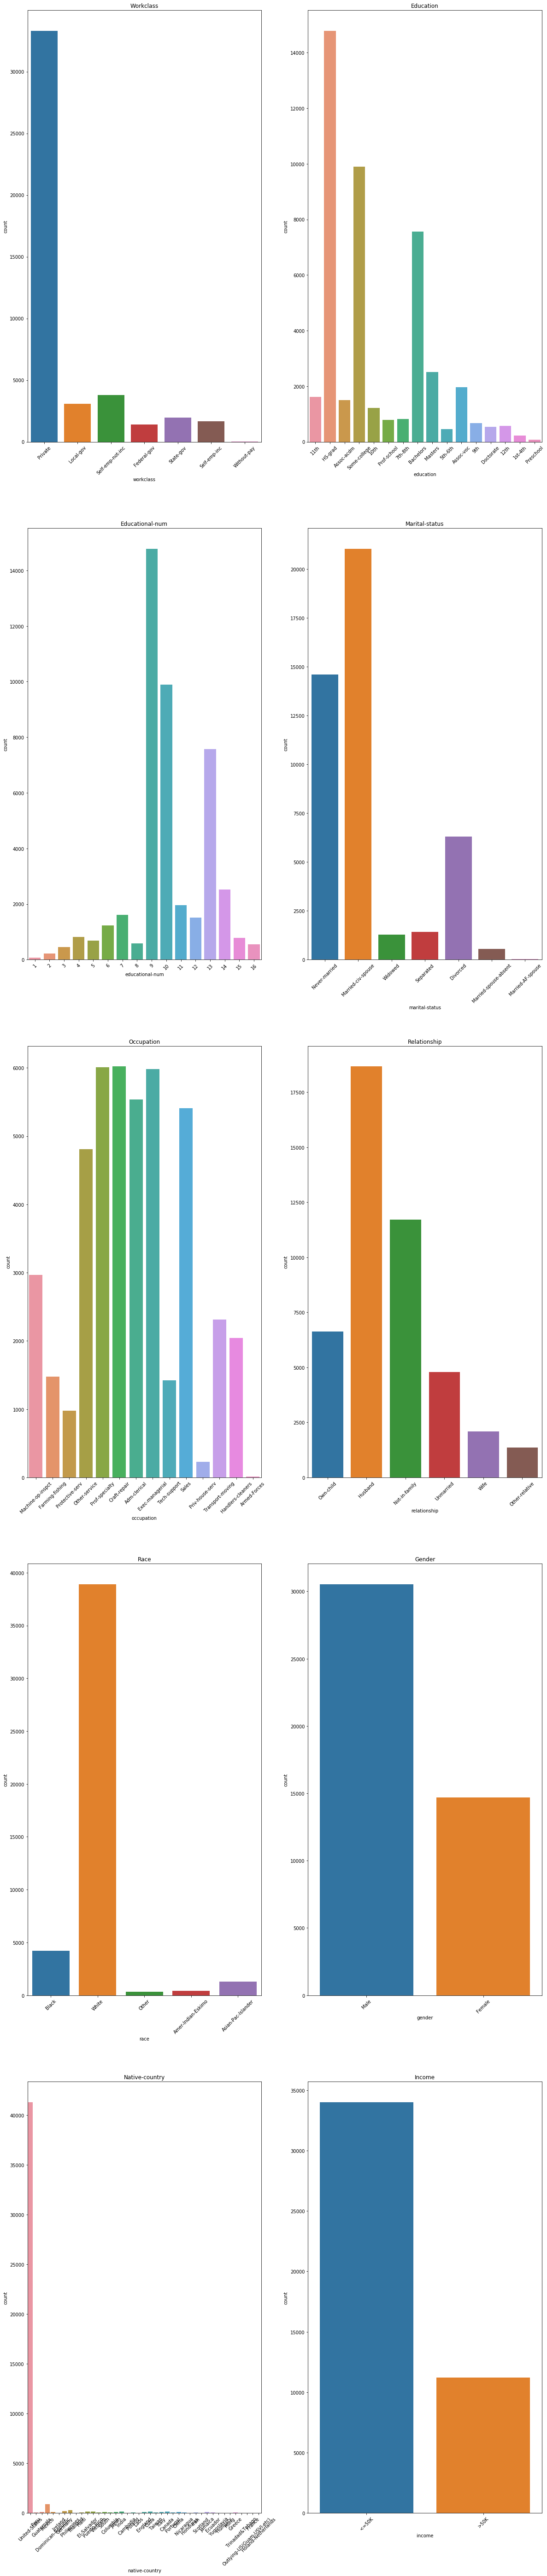

In [19]:
plt.figure(figsize=(20,100))
plt.subplot(5,2,1)
sns.countplot(x='workclass',data=adult_df)
plt.xticks(rotation=45)
plt.title('Workclass')

plt.subplot(5,2,2)
sns.countplot(x='education',data=adult_df)
plt.xticks(rotation=45)
plt.title('Education')


plt.subplot(5,2,3)
sns.countplot(x='educational-num',data=adult_df)
plt.xticks(rotation=45)
plt.title('Educational-num')

plt.subplot(5,2,4)
sns.countplot(x='marital-status',data=adult_df)
plt.xticks(rotation=45)
plt.title('Marital-status')

plt.subplot(5,2,5)
sns.countplot(x='occupation',data=adult_df)
plt.xticks(rotation=45)
plt.title('Occupation')

plt.subplot(5,2,6)
sns.countplot(x='relationship',data=adult_df)
plt.xticks(rotation=45)
plt.title('Relationship')

plt.subplot(5,2,7)
sns.countplot(x='race',data=adult_df)
plt.xticks(rotation=45)
plt.title('Race')

plt.subplot(5,2,8)
sns.countplot(x='gender',data=adult_df)
plt.xticks(rotation=45)
plt.title('Gender')

plt.subplot(5,2,9)
sns.countplot(x='native-country',data=adult_df)
plt.xticks(rotation=45)
plt.title('Native-country')

plt.subplot(5,2,10)
sns.countplot(x='income',data=adult_df)
plt.xticks(rotation=45)
plt.title('Income')


<b>Observations</b>
In this x axis shows the variable and y axis shows count/frequency
<ul>
<li>Workclass</li>
<ul>
<li>We can observe more people engage in private work </li>
<li>There are 7 unique values present in workclass attributes</li>
</ul>
<li>Education</li>
<ul>
<li>We can observe most of them have education degree in HS-grad then other degree</li>
<li>There are 16 unique values present in workclass attributes</li>
</ul>
<li>Marital-status</li>
<ul>
<li>We can observe more people have marital-status Married-civ-spouse followed by never married </li>
<li>There are 7 unique values present in workclass attributes and Minimum number in married-AF-spouse</li>
</ul>
<li>Occupation</li>
<ul>
<li>We can observe that occupation of Individuals are more in Prof-speciality then Craft-repair etc and Armed-forces contains minimum frequency </li>
<li>There are 14 unique values present in workclass attributes </li>

</ul>
<li>Relatioship</li>
<ul>
<li>We can observe more people have relationship status Husband followed by no relationship and other </li>
<li>There are 6 unique values present in workclass attributes</li>
</ul>
<li>Race</li>
<ul>
<li>We can observe more people are of white colour the oyher colours </li>
<li>There are 5 unique values present in workclass attributes</li>
</ul>
<li>Gender</li>
<ul>
<li>We can observe that no.of male is greater than female </li>
<li>There are 2 unique values present in workclass attributes</li>
</ul>
<li>Native-Country</li>
<ul>
<li>We can observe most of them have their native country United-States </li>
<li>There are 5 unique values present in workclass attributes</li>
</ul>
</ul>




# Bivariate Analysis

<h3>Numerical relationship between each column</h3>

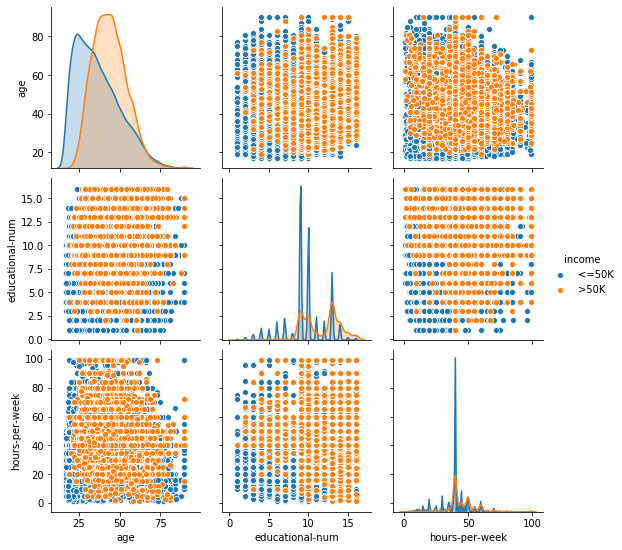

In [20]:
sns.pairplot(adult_df,hue='income',vars=['age','educational-num','hours-per-week'])

<b>Observation</b>
<ul>
<li>The individual of age between ~18 to ~70 works most of the hours per week get more than 50k</li>
<li>We can observe that age attribute that most of the people earns more than 50k</li>
<li>Most of the individuals more educational numbers have more income than 50k</li>
</ul>

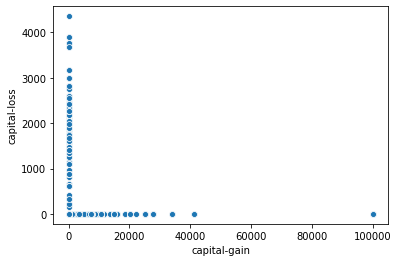

In [21]:
sns.scatterplot(x=adult_df['capital-gain'],y=adult_df['capital-loss'])

<b>Observation</b><ul>
<li>We can observe that both capital gain or loss can be 0</li>
<li>We can conclude that if capital gain is zero capital loss is high or max or vice-versa</li>
</ul>

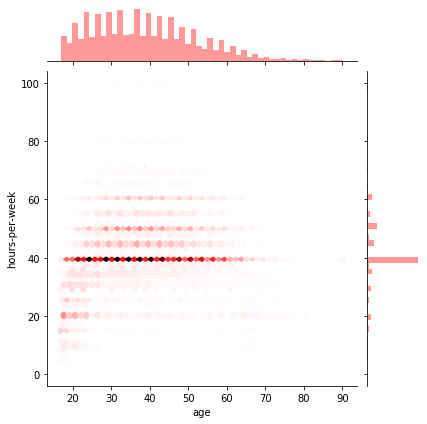

In [22]:
sns.jointplot(x=adult_df['age'],y=adult_df['hours-per-week'],kind='hex',color='r')

<b>Observation</b><ul>
<li>Through this we can state that density is mainlybetween 40-60hours-per-week where the age density is between 20 to 65</li>
</ul>

<h3>Patterns Between Categorical and Numerical column</h3>

<h4>Categorical column v/s age</h4>

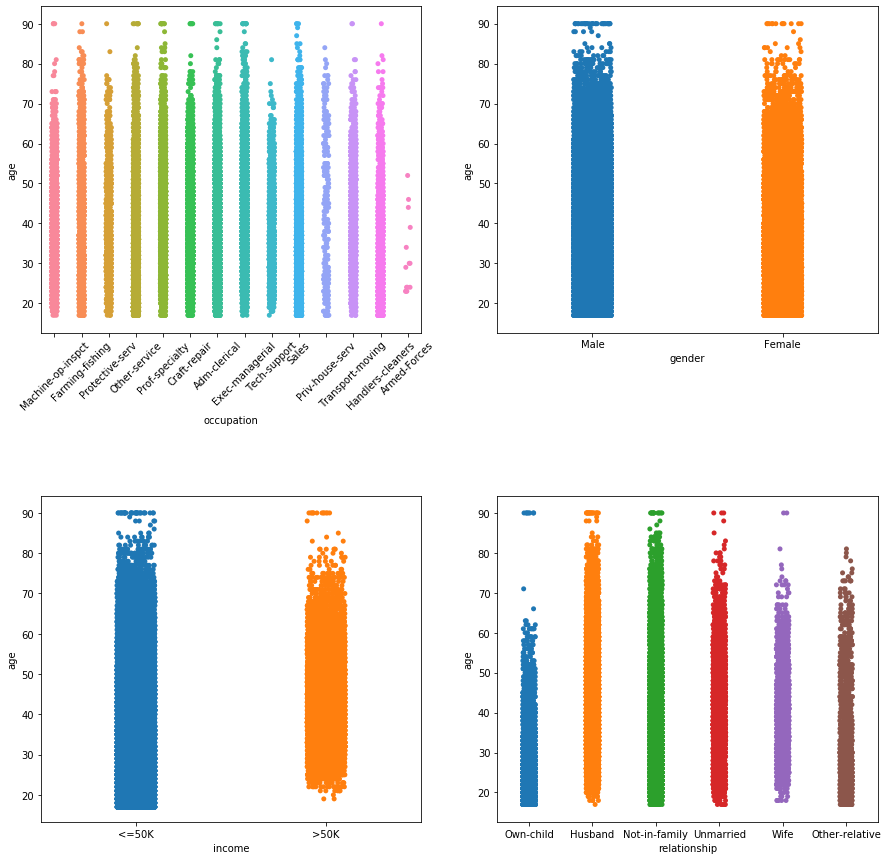

In [23]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2,2,1)
sns.stripplot(data=adult_df,x='occupation',y='age')
plt.xticks(rotation=45)

plt.subplot(2,2,2)
sns.stripplot(data=adult_df,x='gender',y='age')

plt.subplot(2,2,3)
sns.stripplot(data=adult_df,x='income',y='age')

plt.subplot(2,2,4)
sns.stripplot(data=adult_df,x='relationship',y='age')

<b> Observation</b>
<ul>
<li>This shows that there are less number of people above age of70 which has some occupation </li>
<li>There are very few people engage in armed-force</li>
<li>There are less number of people above age of 75 both male and female</li>
<li>There are less number of people who earns more than 50k above age of 70 and below 23</li>
<li>There are few people who has own-childand above age of 60 and above 65 and wife</li>
</ul>

<h4>Categorical column v/s hours-per-week</h4>

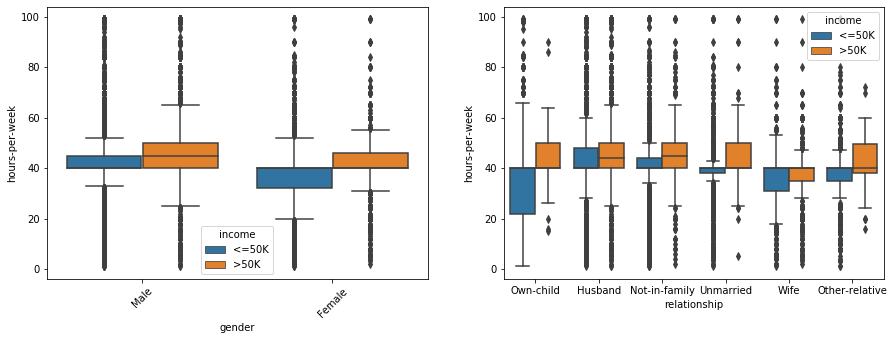

In [24]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(hspace=0.5)


plt.subplot(1,2,1)
sns.boxplot(data=adult_df,x='gender',y='hours-per-week',hue='income')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.boxplot(data=adult_df,x='relationship',y='hours-per-week',hue='income')



<b>Observation</b>
<ul>
<li>We can conclude that mostly male works most of the hours per week than female.who works more hours per week earn more money</li>
<li>We can observe that individual having relationship with wife earns more money</li>

</ul>

<h4>Categorical column v/s educational-num</h4>

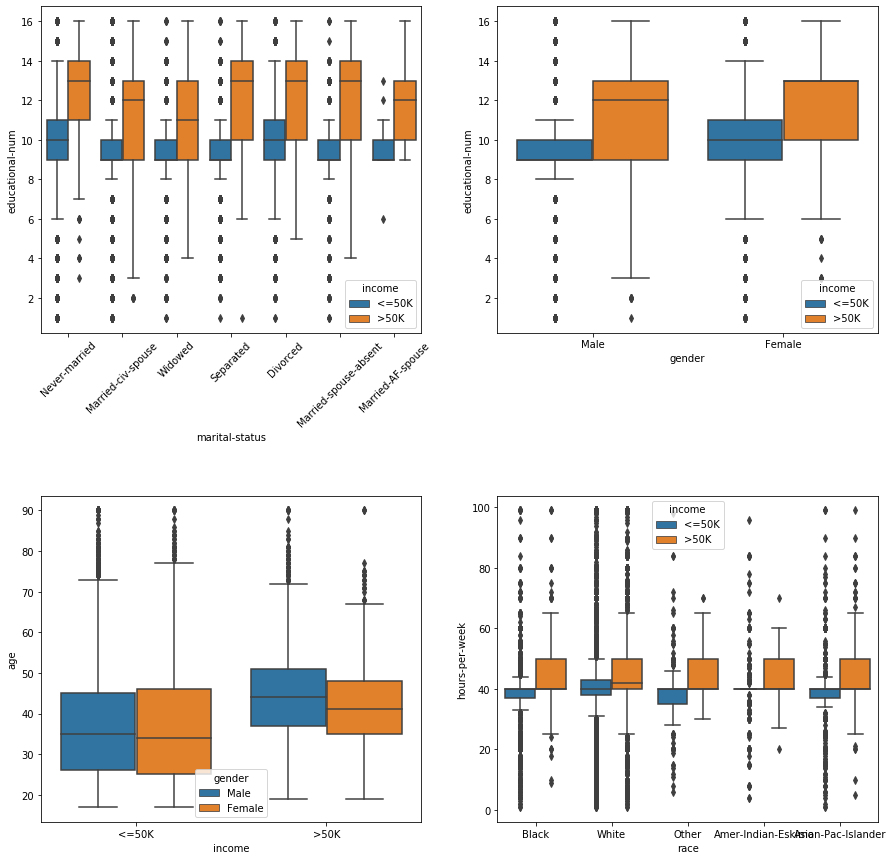

In [25]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2,2,1)
sns.boxplot(data=adult_df,x='marital-status',y='educational-num',hue='income')
plt.xticks(rotation=45)

plt.subplot(2,2,2)
sns.boxplot(data=adult_df,x='gender',y='educational-num',hue='income')

plt.subplot(2,2,3)
sns.boxplot(data=adult_df,x='income',y='age',hue='gender')

plt.subplot(2,2,4)
sns.boxplot(data=adult_df,x='race',y='hours-per-week',hue='income')

<b>Observation</b>
<ul>
<li>We can observe that who have more educational-num earns more than 50k and who have never-married or seperated</li>
<li>This shows that who have more educational number earns more money than50k</li>
<li>We can observe that both male have median age of 35 earns money more or less than 50k and women of 40.</li>
<li>White people earns more income and working most of the hours per week</li>
</ul>

<h2>Conclusion</h2>
<ul>
<li>Capital gain and loss have most of the outliers that is some have maximm profit or loss or some have not at all</li>
<li>Educational-num affecting the income</li>
<li>Those who works more hours per week have more income</li>
<li>Normally individual works between 30 to 50 hours per week</li>
<li>We can conclude that white people earns more money</li>
<li>The individuals have age more than 70 and below 23 have less occupation</li>
<li>Most of the belonging to their native-country United-States</li>
<li>Working and occupation class have more number of missing values that has been treated by droping that rows</li>

</ul>

<h3> Import MinMaxScaler </h3>
Transform feature By a given range

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
col=[]
for i in adult_df:
    if adult_df[i].dtype=="int64":
        col.append(i)
scalar= MinMaxScaler()
adult_df[col]=scalar.fit_transform(adult_df[col])

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...
1,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...
2,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...
3,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...
5,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...
...,...,...,...,...,...
48837,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...
48838,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...
48839,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...
48840,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...,<bound method TransformerMixin.fit_transform o...


<b>Converting categorical column data to dummy variables</b>

In [28]:
workclass=pd.get_dummies(adult_df['workclass'],drop_first=True)

In [29]:
education=pd.get_dummies(adult_df['education'],drop_first=True)

In [32]:
occupation=pd.get_dummies(adult_df['occupation'],drop_first=True)

In [34]:
relationship=pd.get_dummies(adult_df['relationship'],drop_first=True)

In [37]:
race=pd.get_dummies(adult_df['race'],drop_first=True)

In [40]:
native_country=pd.get_dummies(adult_df['native-country'],drop_first=True)

In [41]:
marital_status=pd.get_dummies(adult_df['marital-status'],drop_first=True)

In [43]:
from sklearn.preprocessing import LabelEncoder
scaler=LabelEncoder()

<ul>
<li> The labelencoder used for categorical which has datatype object and have 2 variables in it to convert into binary</li>
</ul>

In [44]:
#using in gender column
male=scaler.fit_transform(adult_df.gender)
male_col=pd.DataFrame(male,columns=['Male'])

In [45]:
#using in income column
income=scaler.fit_transform(adult_df.income)
income_col=pd.DataFrame(male,columns=['>50k'])

<b>Now creating dummy variables for categorical column having more tha two variables</b>

In [46]:
obj=[]
for i in adult_df:
    if adult_df[i].dtype=='object':
        obj.append(i)

<b>Now droping object datatype</b>

In [49]:
adult_df.drop(obj,axis=1,inplace=True)

In [50]:
adult_df=pd.concat([workclass,education,marital_status,occupation,relationship,race,native_country],axis=1)
adult_df=adult_df.reset_index(drop=True,inplace=False)
adult_df=pd.concat([adult_df,male_col,income_col],axis=1)

In [51]:
adult_df

,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,11th,12th,1st-4th,5th-6th,...,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,Male,>50k
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
45218,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
45219,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
45220,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
